In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)

In [2]:
Normal = ['train/Normal/'+name for name in os.listdir('train/Normal') if name.endswith('jpg') ]
Pneumonia = ['train/Pneumonia/'+name for name in os.listdir('train/Pneumonia') if name.endswith('jpg') ]
TB = ['train/TB/'+name for name in os.listdir('train/TB') if name.endswith('jpg') ]
test = ['test/'+name for name in os.listdir('test') if name.endswith('jpg') ]
#loading the images from all the files 

In [3]:
from PIL import Image
def pre_process(path, size=128):
    img=Image.open(path).convert('LA') #2 color channels
    img=np.array(img.resize((size,size)))
    img = np.array(img)
    img = img.reshape(np.multiply(size,size)*2)
    return img
#processing the image to have a size of 128x128 and converting them to greyscale

In [4]:
%%time
Normal = [(pre_process(i), 'Normal') for i in Normal]
Pneumonia = [(pre_process(i),'Pneumonia') for i in Pneumonia]
TB = [(pre_process(i), 'TB') for i in TB]
X_testt = [pre_process(i) for i in test]

CPU times: user 15.6 s, sys: 1.02 s, total: 16.6 s
Wall time: 17.1 s


In [5]:
Normal = np.array(Normal)
Pneumonia = np.array(Pneumonia)
TB = np.array(TB)
X_testt = np.array(X_testt)
X_testt.shape

(66, 32768)

In [6]:
%%time
X= [ j[0]    for i in [Normal,Pneumonia,TB]   for j in i  ]
y= [ j[1]    for i in [Normal,Pneumonia,TB]   for j in i  ]
X = np.array(X)
y = np.array(y)

CPU times: user 3.11 ms, sys: 2.77 ms, total: 5.88 ms
Wall time: 4.91 ms


In [7]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
y = one.fit_transform(y.reshape(-1,1))
y.shape
#onehot encoding y

(251, 3)

In [8]:
y_frame = pd.DataFrame(y.toarray().astype(int))
y_cnn = y_frame.iloc[:,:].to_numpy()

In [9]:
y_cnn

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [10]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

# Scale data to influence variance
X= sc.fit_transform(X)

#Transform the test data as that of the features. Same scale
X_testt = sc.transform(X_testt)

In [11]:
X = X.reshape(X.shape[0],128,128,2)
X_testt= X_testt.reshape(X_testt.shape[0],128,128,2)
#reshaping x and x_testt

In [12]:
#Splitting the values of X
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_cnn,test_size=0.20,random_state=42)

In [13]:
import keras
from keras.optimizers import SGD
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf

In [14]:
epochs=32
activations='sigmoid'

In [15]:
num_class=3

In [16]:
model=Sequential()

model.add(Conv2D(128, kernel_size=3, activation='relu',input_shape=(128,128,2)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D((2,2)))

model.add(Flatten())
# model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
# model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_class, activation='softmax'))
model.summary()
# CNN configuration 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [17]:
%%time
opt = keras.optimizers.Adam(learning_rate=0.0001)
# opt = SGD(learning_rate=0.0001)

# es=EarlyStopping(monitor='val_accuracy',mode='min',verbose=1,patience=50)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
history=model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=15, shuffle=True)
#Fitting the model to the data



Epoch 1/15
7/7 [==============================] - 5s 707ms/step - loss: 0.9888 - accuracy: 0.5100 - val_loss: 0.6544 - val_accuracy: 0.8431
Epoch 2/15
7/7 [==============================] - 5s 684ms/step - loss: 0.6757 - accuracy: 0.7550 - val_loss: 0.3876 - val_accuracy: 0.8824
Epoch 3/15
7/7 [==============================] - 5s 702ms/step - loss: 0.3909 - accuracy: 0.8650 - val_loss: 0.2652 - val_accuracy: 0.9412
Epoch 4/15
7/7 [==============================] - 5s 703ms/step - loss: 0.3120 - accuracy: 0.8650 - val_loss: 0.2861 - val_accuracy: 0.8824
Epoch 5/15
7/7 [==============================] - 5s 712ms/step - loss: 0.3530 - accuracy: 0.8450 - val_loss: 0.2097 - val_accuracy: 0.9216
Epoch 6/15
7/7 [==============================] - 5s 712ms/step - loss: 0.2630 - accuracy: 0.9200 - val_loss: 0.2069 - val_accuracy: 0.9412
Epoch 7/15
7/7 [==============================] - 5s 710ms/step - loss: 0.2231 - accuracy: 0.9050 - val_loss: 0.2969 - val_accuracy: 0.8627
Epoch 8/15
7/7 [====

In [18]:
y_pred=model.predict(X_testt)

In [19]:
%%time
classes= ['Normal', 'Pneumonia','TB']
tt=[]
for i in y_pred:
   xx=np.argmax(i)
   tt.append(classes[xx])
yy=[14,15,9,17,16,8,12,13,11,10,3,2,0,1,5,4,6,18,19,7,28,29,39,38,21,35,34,20,36,22,23,37,33,27,26,32,24,30,31,25,63,62,60,48,49,61,59,65,64,58,42,56,57,43,55,41,40,54,50,44,45,51,47,53,52,46]
for i in yy:
    print (tt[i])
#predicting the labels for the test set

TB
TB
Normal
TB
TB
Pneumonia
Pneumonia
Normal
Pneumonia
Normal
Pneumonia
Normal
Pneumonia
Normal
Pneumonia
Pneumonia
TB
Normal
TB
Pneumonia
TB
TB
Pneumonia
TB
TB
TB
TB
TB
TB
TB
TB
TB
TB
TB
TB
TB
TB
TB
TB
TB
Pneumonia
Normal
Normal
Normal
Normal
Normal
Pneumonia
Pneumonia
Pneumonia
TB
Normal
Normal
Pneumonia
Normal
Normal
Pneumonia
Pneumonia
TB
Pneumonia
Normal
Pneumonia
Pneumonia
Normal
Pneumonia
Pneumonia
Pneumonia
CPU times: user 1.28 ms, sys: 759 µs, total: 2.04 ms
Wall time: 1.47 ms


In [20]:
history.history

{'loss': [0.9888035655021667,
  0.6756885051727295,
  0.3908952474594116,
  0.3120002746582031,
  0.3529985845088959,
  0.2629569172859192,
  0.2230573147535324,
  0.17165055871009827,
  0.1113826185464859,
  0.07815152406692505,
  0.15290901064872742,
  0.0829678550362587,
  0.05955612286925316,
  0.09645931422710419,
  0.059843409806489944],
 'accuracy': [0.5099999904632568,
  0.7549999952316284,
  0.8650000095367432,
  0.8650000095367432,
  0.8450000286102295,
  0.9200000166893005,
  0.9049999713897705,
  0.9399999976158142,
  0.949999988079071,
  0.9750000238418579,
  0.9399999976158142,
  0.9599999785423279,
  0.9850000143051147,
  0.9700000286102295,
  0.9750000238418579],
 'val_loss': [0.6544054746627808,
  0.3876352608203888,
  0.265205979347229,
  0.2860654890537262,
  0.20974820852279663,
  0.20688176155090332,
  0.2969267666339874,
  0.1934560090303421,
  0.18496376276016235,
  0.22925595939159393,
  0.23672255873680115,
  0.15145492553710938,
  0.18051256239414215,
  0.2040

In [21]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

In [22]:
acc1=np.array(acc)
val_acc=np.array(val_acc)

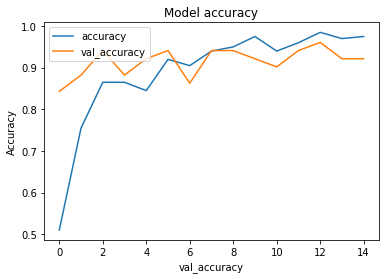

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('val_accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
#plotting the graph of validation accuracy vs accuracy

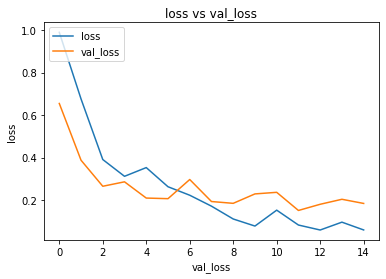

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs val_loss')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
#plotting graph of loss vs validation loss 